# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка Pytorch. 

#        Пример обучения нейронной сети в numpy

In [3]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

(0, 30077107.98689945)
(1, 25275522.611368388)
(2, 22606629.219976388)
(3, 19118516.241797961)
(4, 14844786.313906666)
(5, 10303506.846043486)
(6, 6727649.93852052)
(7, 4235151.6518428288)
(8, 2724802.7938067839)
(9, 1827944.0365348842)
(10, 1303659.2930025491)
(11, 982450.13819325843)
(12, 775523.42535573919)
(13, 632860.99573399057)
(14, 528751.95048641937)
(15, 449011.06024541764)
(16, 385756.68209271261)
(17, 334290.74095241708)
(18, 291660.64540088573)
(19, 255875.89106529686)
(20, 225486.64849249381)
(21, 199501.40405231452)
(22, 177192.18455971015)
(23, 157909.9201374999)
(24, 141142.77645630593)
(25, 126573.94085670287)
(26, 113845.9643411689)
(27, 102663.46868243869)
(28, 92836.009309789923)
(29, 84139.866539822484)
(30, 76433.988981713788)
(31, 69582.081266205278)
(32, 63466.833030068803)
(33, 57998.324503190364)
(34, 53092.607537389456)
(35, 48687.506788563071)
(36, 44725.160753192336)
(37, 41150.231466032827)
(38, 37915.78504800798)
(39, 34989.713356712426)
(40, 32335.76858

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от np.array, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [1]:
import torch

In [3]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [4]:
x


 0.0000e+00  0.0000e+00  1.7423e+21
 4.6577e-10  7.0065e-45  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [5]:
# инициализируем тензор нормальным распределением
x = torch.rand(5, 3)

In [6]:
x


 0.4182  0.7082  0.2494
 0.7768  0.2455  0.5667
 0.9181  0.8303  0.0754
 0.2917  0.0540  0.5722
 0.8588  0.4882  0.1710
[torch.FloatTensor of size 5x3]

In [7]:
x.size()

torch.Size([5, 3])

In [8]:
y = torch.rand(5, 3)

In [9]:
y


 0.7304  0.9615  0.2586
 0.3227  0.7867  0.0043
 0.8287  0.2735  0.0115
 0.2667  0.1086  0.5766
 0.4664  0.3912  0.6080
[torch.FloatTensor of size 5x3]

In [10]:
# Первый способ сложить 2 тензора
x + y


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [11]:
# Второй способ сложить 2 тензора
x.add(y)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [12]:
# А еще можно так:
torch.add(x, y)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [13]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [8]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
print(b) 
np.add(a, 3, out =a)
print(a)
print(b) 


 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]

[ 4.  4.  4.  4.  4.]

 4
 4
 4
 4
 4
[torch.DoubleTensor of size 5]



In [9]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [11]:
print a,b


 0.0143  0.1608 -0.4335
 1.1772 -0.0159 -0.9380
-0.5535  1.2753  0.5010
-0.5390 -0.5172 -0.3403
-0.4381 -0.8944 -0.0568
[torch.FloatTensor of size 5x3]
 
-0.9233  1.2586 -1.4005  1.3548
 1.0765  1.4746 -0.1181  0.5042
-1.6579 -0.7289 -2.0078 -2.2445
[torch.FloatTensor of size 3x4]



In [12]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)


 0.8786  0.5710  0.8314  1.0734
 0.4511  2.1419  0.2365  3.6921
 1.0532  0.8186 -0.3813 -1.2316
 0.5050 -1.1930  1.4992 -0.2271
-0.4641 -1.8290  0.8333 -0.9170
[torch.FloatTensor of size 5x4]

In [13]:
# для python 3

a @ b

SyntaxError: invalid syntax (<ipython-input-13-6c2aa174fbbf>, line 3)

Поменяем пару строчек в обучении на np и код уже можно запускать и на GPU

In [ ]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [15]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [16]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [17]:
x.grad

In [18]:
# производная операции, которая породила переменную.
x.grad_fn

In [19]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

None


В новой версии pytorch промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения нужно использовать
функцию variable.register_hook(print)

In [25]:
from __future__ import print_function
print (y.grad is None)
y.register_hook(print)

True


In [34]:
z = y * y * y* 2
print (z)
print (z.grad is None)
z.register_hook(print)

Variable containing:
 54  54
 54  54
[torch.FloatTensor of size 2x2]

True


In [30]:
out = z.mean()
out

Variable containing:
 54
[torch.FloatTensor of size 1]

In [31]:
# Запускаем бэкпроп
# На выходе получаем градиенты из хуков
out.backward()

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

Variable containing:
 13.5000  13.5000
 13.5000  13.5000
[torch.FloatTensor of size 2x2]



In [32]:

x.grad

Variable containing:
 16.5000  16.5000
 16.5000  16.5000
[torch.FloatTensor of size 2x2]

# Что произошло?

autograd строит ациклический граф вычисления из переменных и операций(функций)
out.backward проходит по всему графу начиная от вершины out и считает градиенты вершин

In [40]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [46]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = 2*x + 2
y.backward(torch.ones(2, 2))
x.grad


Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

In [45]:
gradient = torch.randn(2, 2)
print()

x.grad

AttributeError: 'Variable' object has no attribute 'MyReLU'

In [43]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [44]:
gradient = torch.randn(2, 2)

y.backward(gradient)

x.grad

Variable containing:
 1.9510 -0.9035
 1.2260  1.5587
[torch.FloatTensor of size 2x2]

# Снова вернемся к исходной двухслойной сети

In [28]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

(0, 30894072.0)
(1, 27210876.0)
(2, 26974972.0)
(3, 26030950.0)
(4, 22436260.0)
(5, 16539735.0)
(6, 10629137.0)
(7, 6256730.5)
(8, 3647274.25)
(9, 2223928.25)
(10, 1467547.75)
(11, 1049250.25)
(12, 801396.9375)
(13, 641504.8125)
(14, 529611.875)
(15, 446122.90625)
(16, 380870.625)
(17, 328195.53125)
(18, 284768.21875)
(19, 248408.96875)
(20, 217742.09375)
(21, 191647.109375)
(22, 169367.546875)
(23, 150184.296875)
(24, 133615.640625)
(25, 119247.1484375)
(26, 106722.828125)
(27, 95751.0390625)
(28, 86112.828125)
(29, 77616.734375)
(30, 70105.296875)
(31, 63447.1953125)
(32, 57532.1328125)
(33, 52261.41015625)
(34, 47554.19140625)
(35, 43348.65234375)
(36, 39579.41796875)
(37, 36191.09765625)
(38, 33139.89453125)
(39, 30386.056640625)
(40, 27898.044921875)
(41, 25645.62109375)
(42, 23602.494140625)
(43, 21746.404296875)
(44, 20058.0390625)
(45, 18520.427734375)
(46, 17118.224609375)
(47, 15836.9755859375)
(48, 14665.734375)
(49, 13592.716796875)
(50, 12609.5009765625)
(51, 11707.7441406

# Наконец, в PyTorch базовые (и не только) слои нейронных сетей уже реализованы. Прямо как в первом домашнем задании!

In [47]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 852.677612305
1 547.619750977
2 357.323364258
3 236.555084229
4 158.667312622
5 107.682250977
6 73.8517837524
7 51.1262893677
8 35.690612793
9 25.1017284393
10 17.7726707458
11 12.6592111588
12 9.06585216522
13 6.52432441711
14 4.71620464325
15 3.42302370071
16 2.49366307259
17 1.82281959057
18 1.33662998676
19 0.98295968771
20 0.724810957909
21 0.535788178444
22 0.396976649761
23 0.294763326645
24 0.219308435917
25 0.163475975394
26 0.122072257102
27 0.0913057923317
28 0.0683994740248
29 0.0513146743178
30 0.0385501384735
31 0.0289983060211
32 0.021839896217
33 0.0164676252753
34 0.0124304033816
35 0.0093927225098
36 0.0071043795906
37 0.00537856388837
38 0.00407564267516
39 0.00309085752815
40 0.00234594591893
41 0.00178195908666
42 0.00135453301482
43 0.00103035802022
44 0.000784297706559
45 0.000597385806032
46 0.000455298635643
47 0.000347204913851
48 0.000264931702986
49 0.000202262337552
50 0.000154498018674
51 0.000118075367936
52 9.02911197045e-05
53 6.90661836416e-05
54 5.2

In [48]:
loss_fn(model(x), y)

Variable containing:
1.00000e-12 *
  1.9699
[torch.FloatTensor of size 1]

# А еще там есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [49]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 865.198791504
1 850.292236328
2 835.533203125
3 820.924316406
4 806.466430664
5 792.163024902
6 778.014648438
7 764.024230957
8 750.192504883
9 736.520629883
10 723.010620117
11 709.663879395
12 696.481140137
13 683.462280273
14 670.610046387
15 657.923400879
16 645.403747559
17 633.05090332
18 620.866210938
19 608.848510742
20 596.998046875
21 585.315063477
22 573.799743652
23 562.45135498
24 551.26940918
25 540.253234863
26 529.403076172
27 518.717163086
28 508.195495605
29 497.836700439
30 487.639953613
31 477.604705811
32 467.729064941
33 458.013061523
34 448.453521729
35 439.051391602
36 429.804412842
37 420.7109375
38 411.770141602
39 402.979858398
40 394.339782715
41 385.84765625
42 377.50177002
43 369.301055908
44 361.243927002
45 353.328674316
46 345.55368042
47 337.917022705
48 330.417572021
49 323.054168701
50 315.823944092
51 308.725769043
52 301.758666992
53 294.920227051
54 288.208831787
55 281.623046875
56 275.160919189
57 268.821228027
58 262.602020264
59 256.50204467

In [51]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [52]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [53]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [54]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

SyntaxError: invalid syntax (<ipython-input-54-fe943a70f695>, line 4)

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). PyTorch имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.

Для работы с ним нужно скачать архив https://download.pytorch.org/tutorial/faces.zip и положить его содержимое в папку faces/

Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 32.  65.]
 [ 33.  76.]
 [ 34.  86.]
 [ 34.  97.]]


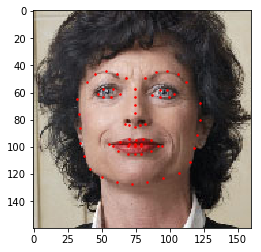

In [58]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.01)  

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для собственного класса датасета нужно отнаследоваться от класса Dataset и реалиховать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [59]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (324, 215, 3) (68, 2)
1 (500, 333, 3) (68, 2)
2 (250, 258, 3) (68, 2)
3 (434, 290, 3) (68, 2)


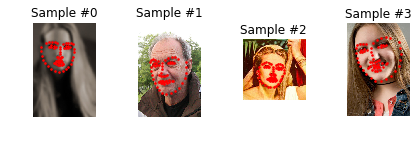

In [60]:
face_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                    root_dir='faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [8]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 256x256 и вырежем случайную область 224x224

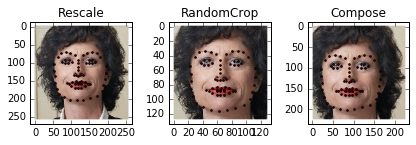

In [9]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [10]:
transformed_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                           root_dir='faces/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


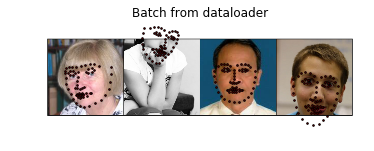

In [11]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break